In [1]:
import json
import random
import urllib.request

HOST = 'odoo'
PORT = 8069
DB = 'fncv'
USER = 'admin'
PASS = 'admin'

def json_rpc(url, method, params):
    data = {
        "jsonrpc": "2.0",
        "method": method,
        "params": params,
        "id": random.randint(0, 1000000000),
    }
    print(json.dumps(data).encode())
    req = urllib.request.Request(url=url, data=json.dumps(data).encode(), headers={
        "Content-Type":"application/json",
    })
    reply = json.loads(urllib.request.urlopen(req).read().decode('UTF-8'))
    if reply.get("error"):
        raise Exception(reply["error"])
    return reply["result"]

def call(url, service, method, *args):
    return json_rpc(url, "call", {"service": service, "method": method, "args": args})

# log in the given database
url = "http://%s:%s/jsonrpc" % (HOST, PORT)
uid = call(url, "common", "login", DB, USER, PASS)

# create a new note
args = []
resultados = call(url, "object", "execute", DB, uid, PASS, 'natacion.club', 'search_read', [], ['club_results'])
print(resultados)

b'{"jsonrpc": "2.0", "method": "call", "params": {"service": "common", "method": "login", "args": ["fncv", "admin", "admin"]}, "id": 16161636}'
b'{"jsonrpc": "2.0", "method": "call", "params": {"service": "object", "method": "execute", "args": ["fncv", 2, "admin", "natacion.club", "search_read", [], ["club_results"]]}, "id": 22522548}'
[{'id': 1, 'club_results': '{"club": "TORNADO SWIM CLUB", "points": 72}'}, {'id': 2, 'club_results': '{"club": "OLIMPIC WAVES", "points": 0}'}, {'id': 3, 'club_results': '{"club": "NEPTUNO TEAM", "points": 0}'}, {'id': 4, 'club_results': '{"club": "TORPEDO AQUA", "points": 0}'}, {'id': 5, 'club_results': '{"club": "TRITON SWIMMERS", "points": 0}'}, {'id': 6, 'club_results': '{"club": "AQUA FORCE", "points": 556}'}, {'id': 7, 'club_results': '{"club": "RAPID STREAM", "points": 98}'}, {'id': 8, 'club_results': '{"club": "BLUE CURRENT", "points": 161}'}, {'id': 9, 'club_results': '{"club": "SPLASH TEAM", "points": 108}'}, {'id': 10, 'club_results': '{"club"

In [2]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

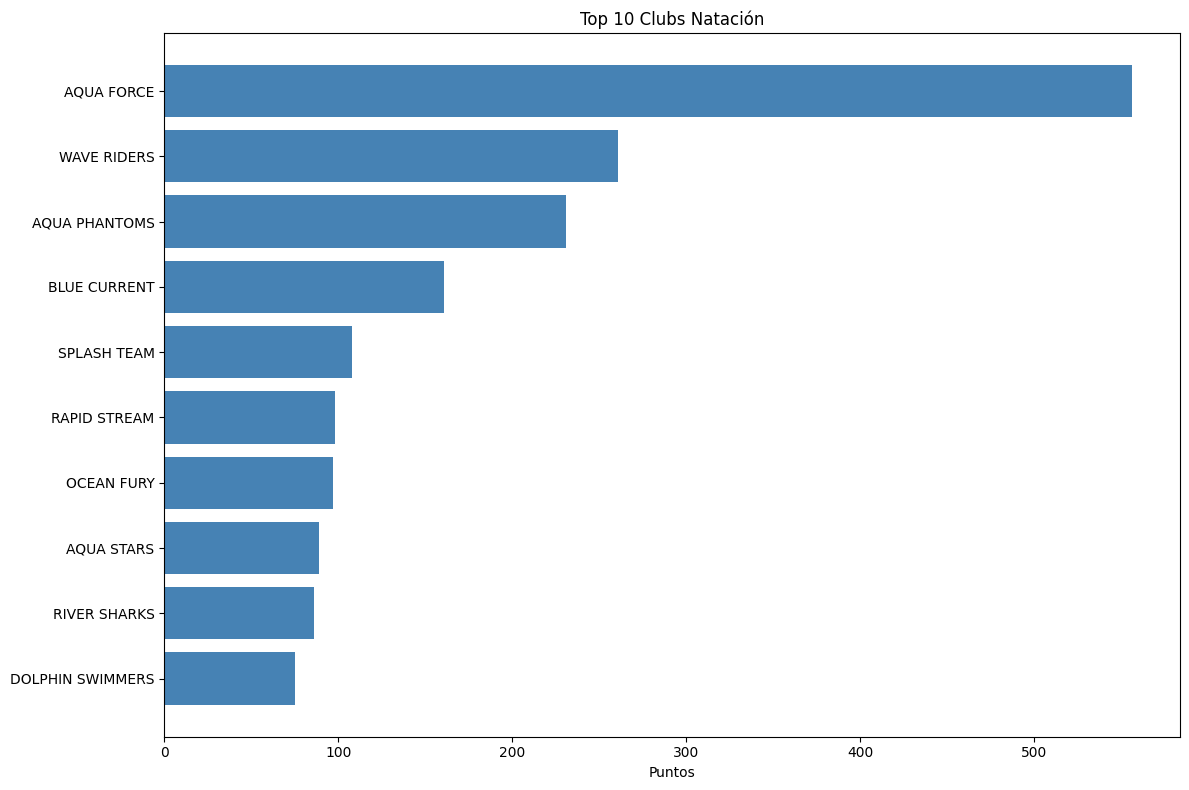

In [4]:


clubs = [json.loads(r['club_results'])['club'] for r in resultados]
points = [json.loads(r['club_results'])['points'] for r in resultados]

# Top 10
top_idx = sorted(range(len(points)), key=lambda k: points[k], reverse=True)[:10]
plt.figure(figsize=(12,8))
plt.barh([clubs[i] for i in top_idx], [points[i] for i in top_idx], color='steelblue')
plt.title('Top 10 Clubs Natación'), plt.xlabel('Puntos')
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()